In [15]:
%pip install pandas
%pip install matplotlib
%pip install codebleu
%pip install tree_sitter_python==0.21


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
results = pd.read_json("/Users/harishgokul/CodeRefineAI/dataset/P1/balanced_samples_llama_codegen_submissions.json")
# Flatten the submission_details column
submission_details_df = pd.json_normalize(results['submission_details'])
results = results.drop(columns=['submission_details']).join(submission_details_df, rsuffix='_details')
results

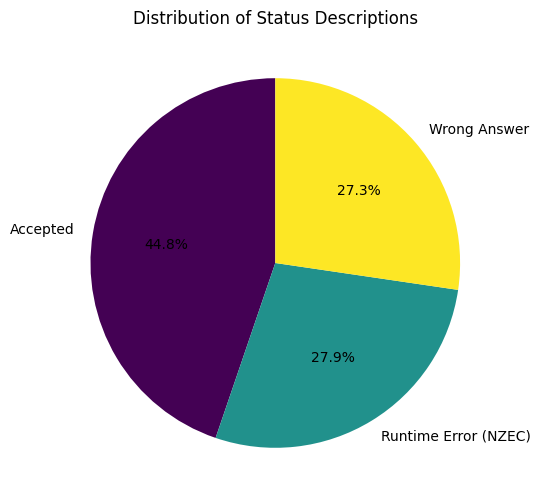

In [18]:
# Group by 'status.description' and count the occurrences
status_counts = results['status.description'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 6))
status_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Distribution of Status Descriptions')
plt.ylabel('')  # Hide the y-label
plt.show()

In [ ]:
# Filter the dataframe for runtime errors
runtime_errors = results[results['status.description'] == 'Runtime Error (NZEC)']
pd.set_option('display.max_colwidth', None)
df = runtime_errors[["question_id", "title", "stderr"]]
print(len(df))
df


In [7]:
# NameError
solution_not_found = df[df['stderr'].str.contains(r"NameError", na=False)]
solution_not_found

,question_id,title,stderr
163,446,arithmetic-slices-ii-subsequence,"Traceback (most recent call last):\n File ""script.py"", line 61, in <module>\n class TestCaseGenerator:\n File ""script.py"", line 63, in TestCaseGenerator\n def generate(self) -> Dict[str, List[int]]:\nNameError: name 'Dict' is not defined\n"


In [8]:
# ModuleNotFoundError
mod_not_found = df[df['stderr'].str.contains(r"ModuleNotFoundError", na=False)]
mod_not_found

,question_id,title,stderr
19,87,scramble-string,"Traceback (most recent call last):\n File ""script.py"", line 26, in <module>\n import numpy as np\nModuleNotFoundError: No module named 'numpy'\n"
122,391,perfect-rectangle,"Traceback (most recent call last):\n File ""script.py"", line 26, in <module>\n import numpy as np\nModuleNotFoundError: No module named 'numpy'\n"
139,363,max-sum-of-rectangle-no-larger-than-k,"Traceback (most recent call last):\n File ""script.py"", line 27, in <module>\n from sortedcontainers import SortedList\nModuleNotFoundError: No module named 'sortedcontainers'\n"


In [9]:
#SyntaxError
inv_syn_found = df[df['stderr'].str.contains(r"SyntaxError", na=False)]
inv_syn_found

,question_id,title,stderr


In [10]:
#TypeError
type_err_found = df[df['stderr'].str.contains(r"TypeError", na=False)]
type_err_found

,question_id,title,stderr
15,130,surrounded-regions,"Traceback (most recent call last):\n File ""script.py"", line 121, in <module>\n runner.run()\n File ""script.py"", line 105, in run\n output = self.solution.solve(**input)\nTypeError: solve() argument after ** must be a mapping, not NoneType\n"
16,82,remove-duplicates-from-sorted-list-ii,"Traceback (most recent call last):\n File ""script.py"", line 142, in <module>\n runner.run()\n File ""script.py"", line 126, in run\n output = self.solution.deleteDuplicates(**input)\n File ""script.py"", line 50, in deleteDuplicates\n dummy = ListNode(0, head)\nTypeError: __init__() takes 2 positional arguments but 3 were given\n"
24,148,sort-list,"Traceback (most recent call last):\n File ""script.py"", line 129, in <module>\n runner.run()\n File ""script.py"", line 113, in run\n output = self.solution.sortList(**input)\nTypeError: sortList() argument after ** must be a mapping, not NoneType\n"
27,153,find-minimum-in-rotated-sorted-array,"Traceback (most recent call last):\n File ""script.py"", line 107, in <module>\n runner.run()\n File ""script.py"", line 91, in run\n output = self.solution.findMin(**input)\nTypeError: findMin() got an unexpected keyword argument 'nums'\n"
87,119,pascals-triangle-ii,"Traceback (most recent call last):\n File ""script.py"", line 47, in <module>\n class Solution:\n File ""script.py"", line 48, in Solution\n def getRow(self, rowIndex: int) -> list[int]:\nTypeError: 'type' object is not subscriptable\n"
94,21,merge-two-sorted-lists,"Traceback (most recent call last):\n File ""script.py"", line 135, in <module>\n runner.run()\n File ""script.py"", line 119, in run\n output = self.solution.mergeTwoLists(**input)\n File ""script.py"", line 56, in mergeTwoLists\n dummy = ListNode()\nTypeError: __init__() missing 1 required positional argument: 'x'\n"
116,338,counting-bits,"Traceback (most recent call last):\n File ""script.py"", line 48, in <module>\n class Solution:\n File ""script.py"", line 49, in Solution\n def countBits(self, n: int) -> list[int]:\nTypeError: 'type' object is not subscriptable\n"
137,404,sum-of-left-leaves,"Traceback (most recent call last):\n File ""script.py"", line 127, in <module>\n runner.run()\n File ""script.py"", line 108, in run\n input = self.test.decode_input(test_case['input'])\n File ""script.py"", line 94, in decode_input\n root = deserialize_tree(elements)\n File ""script.py"", line 89, in deserialize_tree\n node = TreeNode(val=int(val))\nTypeError: __init__() got an unexpected keyword argument 'val'\n"
185,750,contain-virus,"Traceback (most recent call last):\n File ""script.py"", line 134, in <module>\n runner.run()\n File ""script.py"", line 118, in run\n output = self.solution.containVirus(**input)\nTypeError: containVirus() got an unexpected keyword argument 'isInfected'\n"


In [11]:
print("Name Error: ", len(solution_not_found))
print("ModuleImportError: ", len(mod_not_found))
print("SyntaxError: ", len(inv_syn_found))
print("TypeError: ", len(type_err_found))

Name Error:  1
ModuleImportError:  3
SyntaxError:  0
TypeError:  9


{'TypeError': np.int64(9), 'ValueError': np.int64(2), 'ImportError': np.int64(5), 'ModuleNotFoundError': np.int64(3), 'Others': np.int64(3)}


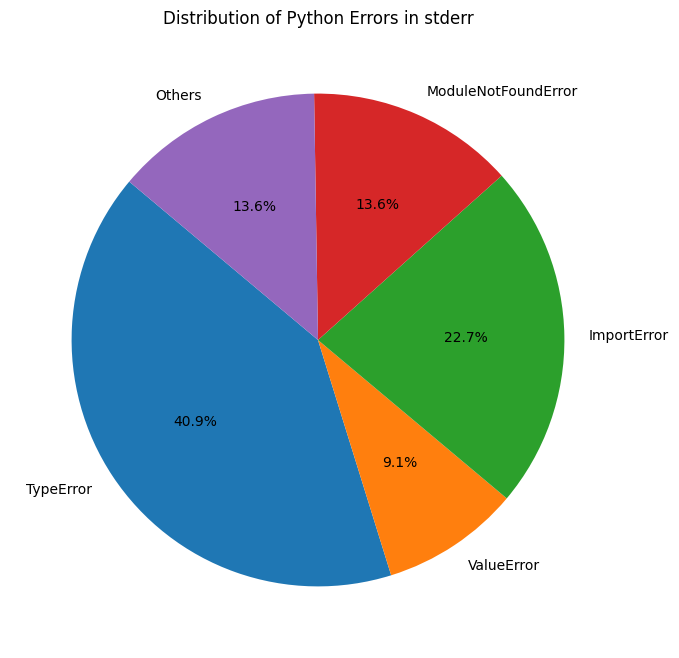

In [12]:
# Define common Python errors
python_errors = [
    "SyntaxError", "IndentationError", "TypeError", "NameError", "IndexError", "KeyError",
    "AttributeError", "ValueError", "ImportError", "ModuleNotFoundError", "ZeroDivisionError",
    "FileNotFoundError", "IOError", "EOFError", "RuntimeError", "RecursionError",
    "NotImplementedError", "AssertionError", "MemoryError", "OverflowError",
    "StopIteration", "UnboundLocalError", "PermissionError", "TimeoutError"
]

# Count occurrences of each error
error_counts = {error: df['stderr'].str.contains(rf"\b{error}\b", na=False).sum() for error in python_errors}

# Convert error counts into a DataFrame
error_df = pd.DataFrame(list(error_counts.items()), columns=["Error Type", "Count"])
error_df = error_df.sort_values(by="Count", ascending=False).reset_index(drop=True)

# Categorize errors: keep major ones, group smaller ones as "Others"
threshold = 1  # Errors with count <= threshold will be grouped as "Others"
filtered_errors = {err: count for err, count in error_counts.items() if count > threshold}
others_count = sum(count for err, count in error_counts.items() if count <= threshold)

# Add "Others" category if applicable
if others_count > 0:
    filtered_errors["Others"] = others_count

# Display DataFrame
print(filtered_errors)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_errors.values(), labels=filtered_errors.keys(), autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Python Errors in stderr")
plt.show()


In [5]:
from codebleu import calc_codebleu


solutions = pd.read_json("/Users/harishgokul/CodeRefineAI/dataset/optimized_test_results_meta.json")
for _,s in solutions.iterrows():
    result = calc_codebleu(
        [s["inefficient_code"]], 
        [s["optimized_code"]], 
        lang="python",
        weights=(0.25, 0.25, 0.25, 0.25), 
        tokenizer=None)

    print(s['question_id'],result)

1 {'codebleu': 0.964572430449967, 'ngram_match_score': 0.9273397041322389, 'weighted_ngram_match_score': 0.9309500176676291, 'syntax_match_score': 1.0, 'dataflow_match_score': 1.0}
2 {'codebleu': 0.6084799009039403, 'ngram_match_score': 0.588040181586966, 'weighted_ngram_match_score': 0.5922562336229982, 'syntax_match_score': 0.7536231884057971, 'dataflow_match_score': 0.5}
4 {'codebleu': 0.8440371058640097, 'ngram_match_score': 0.7795285572048857, 'weighted_ngram_match_score': 0.7842389138702013, 'syntax_match_score': 0.86, 'dataflow_match_score': 0.9523809523809523}
5 {'codebleu': 0.982233581254635, 'ngram_match_score': 0.9632392640962604, 'weighted_ngram_match_score': 0.9656950609222799, 'syntax_match_score': 1.0, 'dataflow_match_score': 1.0}
6 {'codebleu': 0.9462036653449805, 'ngram_match_score': 0.8966504482368522, 'weighted_ngram_match_score': 0.9298308798097361, 'syntax_match_score': 0.9583333333333334, 'dataflow_match_score': 1.0}
8 {'codebleu': 1.0, 'ngram_match_score': 1.0, '

In [20]:
import pandas as pd

# File paths
codegen_file = "/Users/harishgokul/CodeRefineAI/dataset/P1/balanced_samples_llama_codegen_submissions.json"
reference_file = "/Users/harishgokul/CodeRefineAI/dataset/P1/balanced_samples_llama_reference_submissions.json"

# Load the DataFrames
codegen_df = pd.read_json(codegen_file)
submission_details_df = pd.json_normalize(codegen_df['submission_details'])
codegen_df = codegen_df.drop(columns=['submission_details']).join(submission_details_df, rsuffix='_details')

reference_df = pd.read_json(reference_file)
submission_details_df = pd.json_normalize(reference_df['submission_details'])
reference_df = reference_df.drop(columns=['submission_details']).join(submission_details_df, rsuffix='_details')


# Filter accepted solutions
codegen_accepted = codegen_df[codegen_df['status.description'] == 'Accepted']
reference_accepted = reference_df[reference_df['status.description'] == 'Accepted']

# Initialize lists to store results
faster_solutions = []
more_memory_efficient_solutions = []

# Compare performance for each question
for question_id in codegen_accepted['question_id'].unique():
    codegen_solution = codegen_accepted[codegen_accepted['question_id'] == question_id]
    reference_solution = reference_accepted[reference_accepted['question_id'] == question_id]
    
    if not codegen_solution.empty and not reference_solution.empty:
        codegen_runtime = codegen_solution['time'].values[0]
        reference_runtime = reference_solution['time'].values[0]
        codegen_memory = codegen_solution['memory'].values[0]
        reference_memory = reference_solution['memory'].values[0]
        
        # Determine which solution is faster
        if codegen_runtime < reference_runtime:
            faster_solutions.append((question_id, 'codegen', codegen_runtime, reference_runtime))
        else:
            faster_solutions.append((question_id, 'reference', codegen_runtime, reference_runtime))
        
        # Determine which solution is more memory efficient
        if codegen_memory < reference_memory:
            more_memory_efficient_solutions.append((question_id, 'codegen', codegen_memory, reference_memory))
        else:
            more_memory_efficient_solutions.append((question_id, 'reference', codegen_memory, reference_memory))

# Convert results to DataFrames
faster_solutions_df = pd.DataFrame(faster_solutions, columns=['question_id', 'faster_solution', 'codegen_runtime', 'reference_runtime'])
more_memory_efficient_solutions_df = pd.DataFrame(more_memory_efficient_solutions, columns=['question_id', 'more_memory_efficient_solution', 'codegen_memory', 'reference_memory'])

In [21]:
total = len(faster_solutions_df)
count = (faster_solutions_df["faster_solution"] == "codegen").sum()
print("LLM Actually sucks", count / total * 100)

LLM Actually sucks 56.71641791044776
